# UB Philantropy- Donor category and amount prediction


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### Loading Data
Let's first load the required libraries and Philantropy Dataset using pandas' read CSV function 

In [2]:
ub_philantropy = pd.read_csv(r"F:\UB Philantrophy\Management_zipcode_1_use.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ub_philantropy.shape

(34338, 52)

### Overview of the Datsaet

In [4]:
ub_philantropy.head(5)

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


Lets take a look at the variables available

In [5]:
ub_philantropy.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIPCODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DEGREE_CODE3', 'DEGREE_YEAR3', 'SCHOOL3',
       'DEGREE_CODE4', 'DEGREE_YEAR4', 'SCHOOL4', 'DONOR_CATEGORY',
       'LIFETIME_RECOGNITION_AMT', 'NO_YRS_GIVING', 'GIFT_AMOUNT_2018_NEW',
       'GIFT_AMOUNT_2017_NEW', 'GIFT_AMOUNT_2016_NEW', 'GIFT_AMOUNT_2015_NEW',
       'GIFT_AMOUNT_2014_NEW', 'GIFT_AMOUNT_2013_NEW', 'GIFT_AMOUNT_2012_NEW',
       'GIFT_AMOUNT_2011_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2009_NEW',
       'GIFT_AMOUNT_2008_NEW', 'LAST_GIFT_DATE', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1', 'GIVING_SCHOOL_UNIT2',
       'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE', 'NO_EVENTS_2018_NEW',
       'NO_EVENTS_2017_NEW', 'NO_EVENTS_2016_NEW', 'NO_EVENTS_2015_NEW',
       'NO_EVENTS_2014_NEW', 'NO_EVENTS_2

### Visualizing the Categories

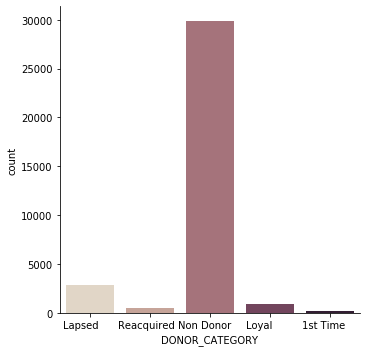

In [6]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=ub_philantropy)

In [7]:
ub_philantropy.isnull().sum()

ID_NUMBER                           0
FACULTY_STAFF_IND                   0
MARITAL_STATUS                      0
GENDER                              0
AGE_BRACKET                         0
STATE_CODE                        291
ZIPCODE                           292
STUDENT_ACTIVITY_PARTICIPANT        0
DEGREE_CODE1                        0
DEGREE_YEAR1                        0
SCHOOL1                             0
DEGREE_CODE2                        0
DEGREE_YEAR2                        0
SCHOOL2                         28807
DEGREE_CODE3                        0
DEGREE_YEAR3                        0
SCHOOL3                         33772
DEGREE_CODE4                        0
DEGREE_YEAR4                        0
SCHOOL4                         34300
DONOR_CATEGORY                      0
LIFETIME_RECOGNITION_AMT        23303
NO_YRS_GIVING                   23083
GIFT_AMOUNT_2018_NEW                0
GIFT_AMOUNT_2017_NEW                0
GIFT_AMOUNT_2016_NEW                0
GIFT_AMOUNT_

In [8]:
cols = ub_philantropy.columns.tolist()
drop_cols = []
for col in cols:
    if ub_philantropy[col].isnull().sum() > 500:
        drop_cols.append(col)
        
ub_philantropy.drop(columns=drop_cols, inplace=True)

In [9]:
ub_philantropy.shape

(34338, 41)

In [10]:
print('Total numerical vlaued columns: ', len(ub_philantropy.select_dtypes(include=np.number).columns), '\n')
for col in ub_philantropy.select_dtypes(include=np.number).columns:
    print(col)

Total numerical vlaued columns:  26 

ID_NUMBER
AGE_BRACKET
DEGREE_YEAR1
GIFT_AMOUNT_2018_NEW
GIFT_AMOUNT_2017_NEW
GIFT_AMOUNT_2016_NEW
GIFT_AMOUNT_2015_NEW
GIFT_AMOUNT_2014_NEW
GIFT_AMOUNT_2013_NEW
GIFT_AMOUNT_2012_NEW
GIFT_AMOUNT_2011_NEW
GIFT_AMOUNT_2010_NEW
GIFT_AMOUNT_2009_NEW
GIFT_AMOUNT_2008_NEW
ENGAGEMENT_SCORE
NO_EVENTS_2018_NEW
NO_EVENTS_2017_NEW
NO_EVENTS_2016_NEW
NO_EVENTS_2015_NEW
NO_EVENTS_2014_NEW
NO_EVENTS_2013_NEW
NO_EVENTS_2012_NEW
NO_EVENTS_2011_NEW
NO_EVENTS_2010_NEW
NO_EVENTS_2009_NEW
NO_EVENTS_2008_NEW


In [11]:
print('Total categorical valued columns: ', len(ub_philantropy.select_dtypes(include=np.object).columns), '\n')
for col in ub_philantropy.select_dtypes(include=np.object).columns:
    print(col)

Total categorical valued columns:  15 

FACULTY_STAFF_IND
MARITAL_STATUS
GENDER
STATE_CODE
ZIPCODE
STUDENT_ACTIVITY_PARTICIPANT
DEGREE_CODE1
SCHOOL1
DEGREE_CODE2
DEGREE_YEAR2
DEGREE_CODE3
DEGREE_YEAR3
DEGREE_CODE4
DEGREE_YEAR4
DONOR_CATEGORY


In [12]:
#Correlation between GIFT_AMOUNT_2018_NEW and other numerical values
ub_philantropy.corr()['GIFT_AMOUNT_2018_NEW'].sort_values(ascending=False)

GIFT_AMOUNT_2018_NEW    1.000000
GIFT_AMOUNT_2015_NEW    0.326208
GIFT_AMOUNT_2014_NEW    0.273330
GIFT_AMOUNT_2012_NEW    0.233355
GIFT_AMOUNT_2013_NEW    0.220807
GIFT_AMOUNT_2010_NEW    0.214064
GIFT_AMOUNT_2016_NEW    0.199159
GIFT_AMOUNT_2009_NEW    0.182934
GIFT_AMOUNT_2017_NEW    0.168465
ENGAGEMENT_SCORE        0.153428
NO_EVENTS_2014_NEW      0.098489
NO_EVENTS_2018_NEW      0.098176
GIFT_AMOUNT_2011_NEW    0.093104
NO_EVENTS_2017_NEW      0.090915
NO_EVENTS_2013_NEW      0.089592
NO_EVENTS_2015_NEW      0.080415
NO_EVENTS_2016_NEW      0.072375
NO_EVENTS_2009_NEW      0.069504
NO_EVENTS_2011_NEW      0.061458
NO_EVENTS_2012_NEW      0.059055
NO_EVENTS_2010_NEW      0.058058
NO_EVENTS_2008_NEW      0.053499
AGE_BRACKET             0.020469
GIFT_AMOUNT_2008_NEW    0.012120
DEGREE_YEAR1           -0.025627
ID_NUMBER              -0.026878
Name: GIFT_AMOUNT_2018_NEW, dtype: float64

In [13]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 10,6

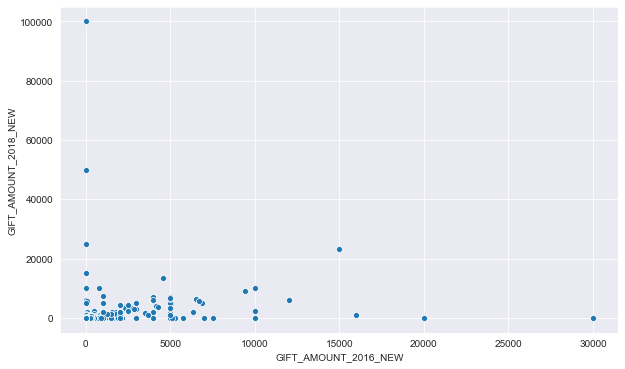

In [14]:
#Relation between target variable and highest correlated feature
sns.scatterplot(data=ub_philantropy,
           x=ub_philantropy['GIFT_AMOUNT_2016_NEW'],
           y=ub_philantropy['GIFT_AMOUNT_2018_NEW']
          )

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


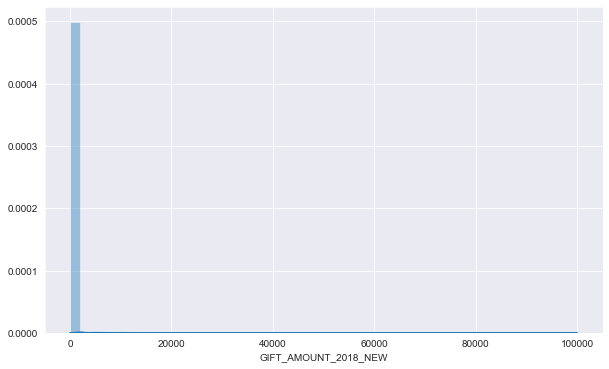

In [15]:
sns.distplot(ub_philantropy['GIFT_AMOUNT_2018_NEW'])
plt.show()

### Feature Selection
Here we  need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)

In [16]:
feature_cols = ['GIFT_AMOUNT_2009_NEW', 'GIFT_AMOUNT_2010_NEW','GIFT_AMOUNT_2012_NEW','GIFT_AMOUNT_2013_NEW','GIFT_AMOUNT_2014_NEW','GIFT_AMOUNT_2015_NEW','GIFT_AMOUNT_2016_NEW','GIFT_AMOUNT_2017_NEW']
X = ub_philantropy[feature_cols] # Features
y = ub_philantropy.DONOR_CATEGORY # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy<br>
Let's split the dataset by using function train_test_split().We need to pass parameters features, target, and test_set size

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn

In [92]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the categories of donors<br>
Accuracy can be computed by comparing actual test set values and predicted values

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591341487089885


In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9586488060570763


We reduce the maximum depth which is the numberof branches a tree can handle<br>


In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.950592118035333


### Conclusion:
    We have categorized the alumni to:
    1. Donors
    2. Non Donors
    3. Loyal Donors
    4. Acquired Donors
    5. Lapsed Donors
    
We have acheived a model accuracy of 95 % which is good
    
    

# Targetting the first time donors -Pre defined Classification

In [22]:
Philantrophy_data=pd.read_csv(r'F:\UB Philantrophy\Management_zipcode_1_use.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
Philantrophy_data.shape

(34338, 52)

In [24]:
Philantrophy_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x=Philantrophy_data.groupby('DONOR_CATEGORY')

In [26]:
x.size()

DONOR_CATEGORY
1st Time          223
Lapsed           2823
Loyal             920
Non Donor       29868
Reacquired        504
dtype: int64

In [27]:
First_time_donor=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]


In [28]:
len(First_time_donor)

223

In [29]:
Philantrophy_data['DONOR_CATEGORY'].unique()

array(['Lapsed      ', 'Reacquired  ', 'Non Donor   ', 'Loyal       ',
       '1st Time    '], dtype=object)

In [30]:
Non_donor_sample=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "Non Donor   "]

In [31]:
Non_donor_sample = Non_donor_sample.sample(300)

In [32]:
First_time_donor.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
99,443721,N,U,M,25,NJ,7058,N,MS,2014,...,0,0,0,0,0,0,0,0,0,0
135,477319,N,U,M,30,NY,14217,N,BS,2018,...,0,0,0,0,0,0,0,0,0,0
150,401147,N,U,M,25,NY,10022,Y,MS,2015,...,0,1,0,3,1,0,0,0,0,0
172,466964,N,U,M,25,NY,11236,Y,MBA,2018,...,2,0,0,0,0,0,0,0,0,0
338,372594,N,S,F,30,NY,14610,Y,BS,2011,...,0,0,0,0,0,0,0,0,0,0


In [33]:
Sampled_data=Philantrophy_data.sample(n=300, random_state=1)

In [34]:
Sampled_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
26535,412517,N,U,F,25,OH,44312,N,BS,2013,...,0,0,0,0,0,0,0,0,0,0
1960,23805,N,M,M,60,VA,20148,Y,MBA,1979,...,0,0,0,0,0,0,0,0,0,0
27638,370967,N,U,M,30,NY,11710,N,BS,2009,...,1,0,0,0,1,0,0,0,0,0
26740,295682,N,U,F,60,,31015,N,SEMBA,2003,...,0,0,0,0,0,0,0,0,0,0
34177,34021,N,U,M,50,,,N,MBA,1992,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Sampled_data['DONOR_CATEGORY'].value_counts()

Non Donor       268
Lapsed           23
Loyal             6
1st Time          2
Reacquired        1
Name: DONOR_CATEGORY, dtype: int64

In [36]:
y=Sampled_data[Sampled_data['DONOR_CATEGORY'] != '1st Time    ']

In [37]:
y.groupby('DONOR_CATEGORY').size()

DONOR_CATEGORY
Lapsed           23
Loyal             6
Non Donor       268
Reacquired        1
dtype: int64

In [38]:
First_time_with_sampled=pd.concat([First_time_donor, Non_donor_sample])

In [39]:
len(First_time_with_sampled)

523

In [40]:
First_time_with_sampled['DONOR_CATEGORY']=First_time_with_sampled['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled['MARITAL_STATUS']=First_time_with_sampled['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [41]:
First_time_with_sampled['MARITAL_STATUS']=First_time_with_sampled['MARITAL_STATUS'].apply(lambda x:x if (x == 'S'or x==  'M') else 'O')

In [42]:
First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled['AGE_BRACKET'].fillna((First_time_with_sampled['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled['ENGAGEMENT_SCORE'].mean()),inplace=True)






In [43]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

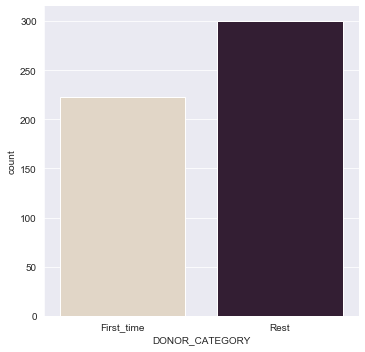

In [44]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled)

In [45]:
p=First_time_with_sampled[feature_cols]
q=First_time_with_sampled['DONOR_CATEGORY']

In [46]:
p_train,p_test,q_train,q_test = train_test_split(p, q, test_size=0.3, random_state=1)

In [47]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(p_train,q_train)
q_pred = clf.predict(p_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(q_test, q_pred))

Accuracy: 0.9808917197452229


C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


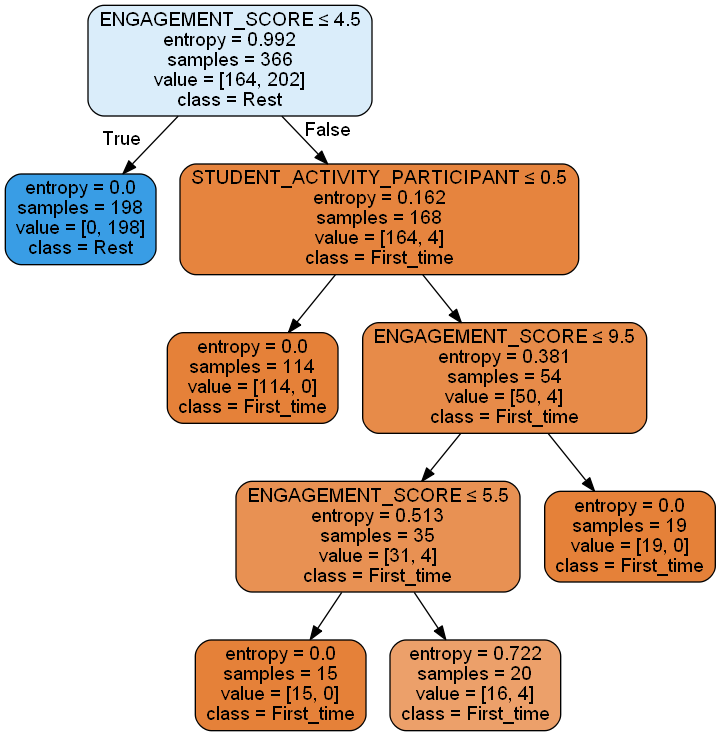

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy.png')
Image(graph.create_png())

### Reclassification - Based on Last given Amount

In [50]:
Philantrophy_data['LAST_GIFT_DATE']=Philantrophy_data['LAST_GIFT_DATE'].apply(lambda x:str(x))

In [51]:
Philantrophy_data['LAST_GIFT_DATE'].dropna()

0        23-08-2018
1        10-10-2017
2        15-01-1992
3        28-01-1987
4        30-12-1994
            ...    
34333           nan
34334           nan
34335           nan
34336           nan
34337           nan
Name: LAST_GIFT_DATE, Length: 34338, dtype: object

In [52]:
Philantrophy_data['LAST_GIFT_DATE'].dropna().isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
34333    False
34334    False
34335    False
34336    False
34337    False
Name: LAST_GIFT_DATE, Length: 34338, dtype: bool

In [53]:
for i in range(len(Philantrophy_data['LAST_GIFT_DATE'])):    
    try:
        string=Philantrophy_data.loc[i,'LAST_GIFT_DATE']    
        string=(string[6]+string[7]+string[8]+string[9])
        Philantrophy_data.loc[i,'LAST_GIFT_DATE']=string
    except:
        continue
    

In [54]:
Philantrophy_data.iloc[1,20]

'Reacquired  '

In [55]:
Philantrophy_data.iloc[1,34]

'2017'

In [56]:
for i in range(len(Philantrophy_data)):
    if Philantrophy_data.iloc[i,34] == '2018':
        Philantrophy_data.iloc[i,20] = '1st Time    '
        
     
        

In [57]:
Philantrophy_data['DONOR_CATEGORY'].value_counts()

Non Donor       29848
Lapsed           2699
1st Time         1282
Loyal             293
Reacquired        216
Name: DONOR_CATEGORY, dtype: int64

In [58]:
First_time_donor_new=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]

In [59]:
Sampled_data_new=Philantrophy_data.sample(n=1200, random_state=1)

In [60]:
y_new=Sampled_data_new[Sampled_data_new['DONOR_CATEGORY'] != '1st Time    ']

In [61]:
First_time_with_sampled_new=pd.concat([First_time_donor_new,y_new])

In [62]:
First_time_with_sampled_new['DONOR_CATEGORY']=First_time_with_sampled_new['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled_new['MARITAL_STATUS']=First_time_with_sampled_new['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [63]:
First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled_new['AGE_BRACKET'].fillna((First_time_with_sampled_new['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled_new['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled_new['ENGAGEMENT_SCORE'].mean()),inplace=True)




In [64]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

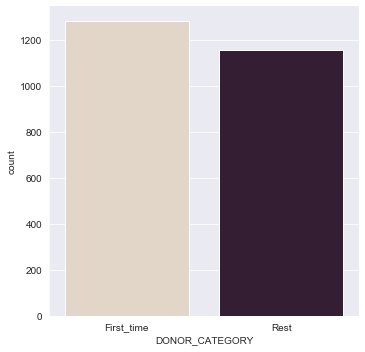

In [65]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled_new)

In [66]:
p1=First_time_with_sampled_new[feature_cols]
q1=First_time_with_sampled_new['DONOR_CATEGORY']

In [67]:
p1_train,p1_test,q1_train,q1_test = train_test_split(p1, q1, test_size=0.3, random_state=1)

In [68]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf1 = clf1.fit(p1_train,q1_train)
q1_pred = clf1.predict(p1_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(q1_test, q1_pred))

Accuracy: 0.9631147540983607


In [70]:
len(q1_test)

732

In [71]:
len(q1_pred)

732

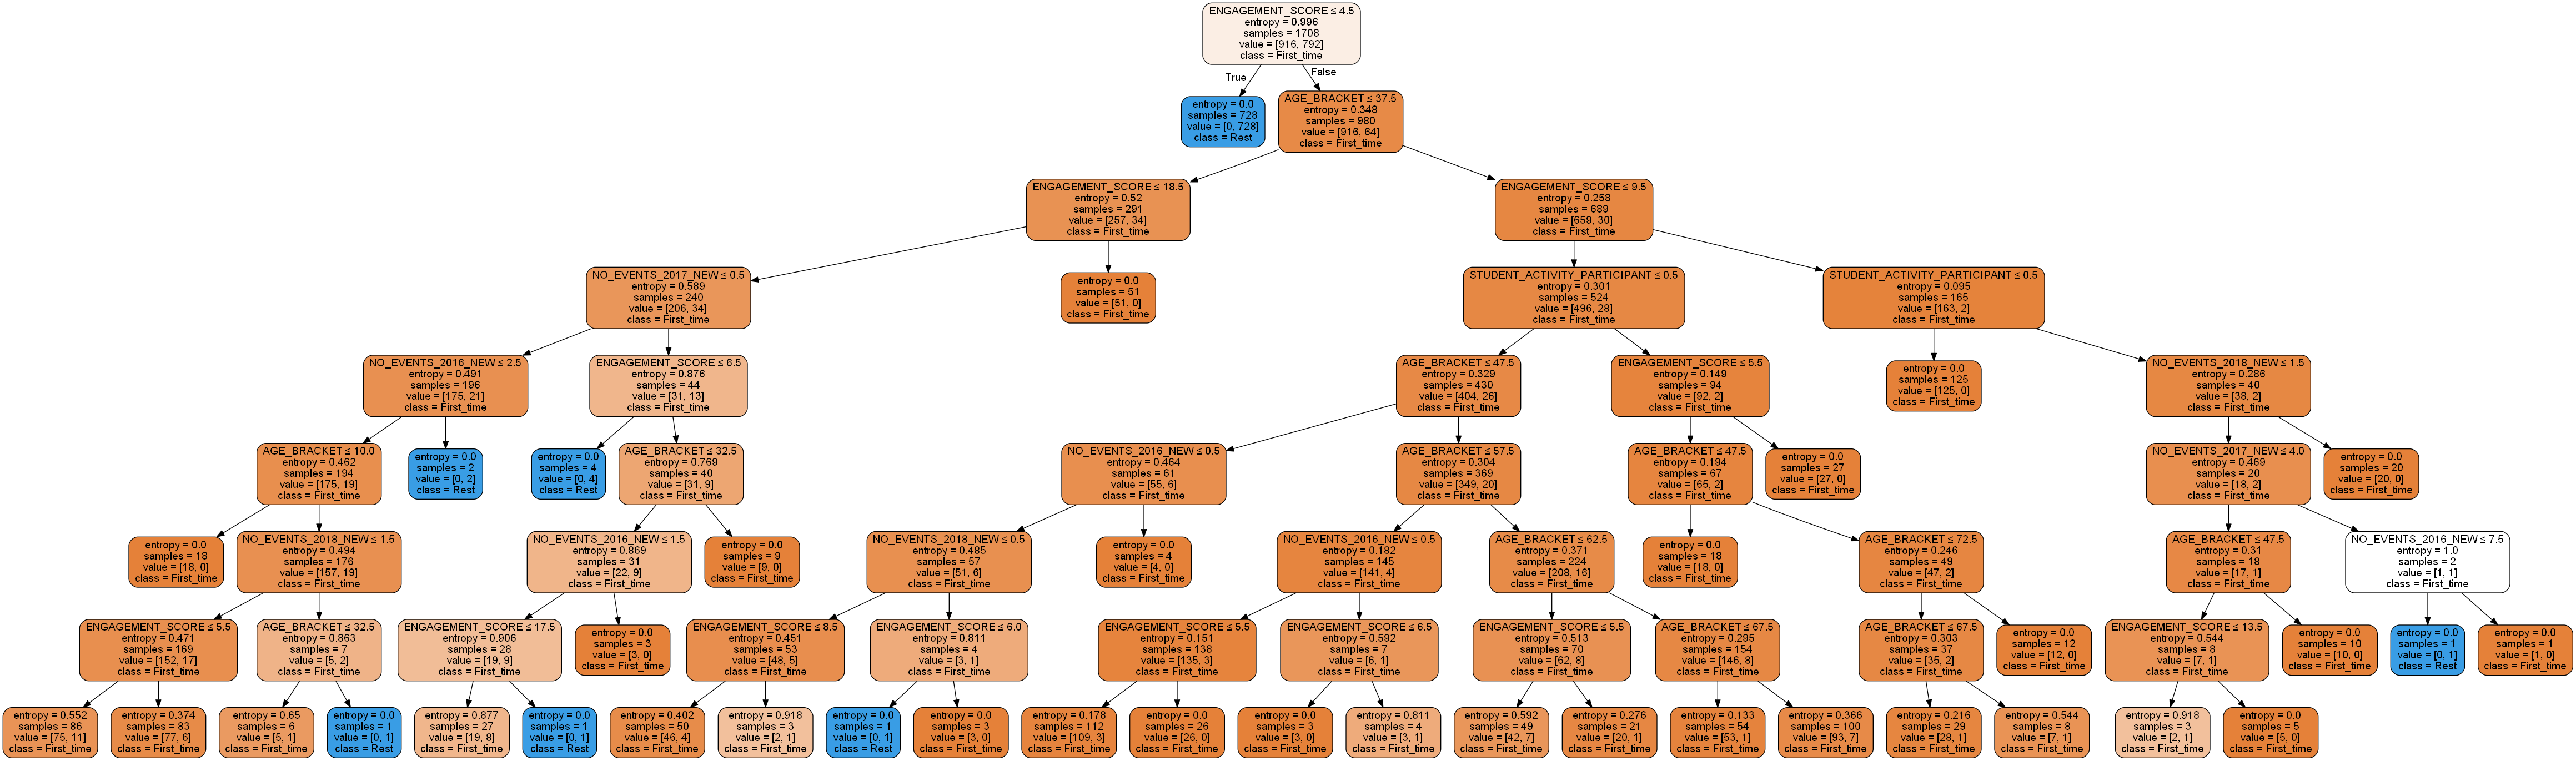

In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_new.png')
Image(graph.create_png())

## Reacquired Donors

In [73]:
Philantropy_new=pd.read_csv(r'F:\UB Philantrophy\Management_zipcode_1_use.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
Philantropy_new.shape

(34338, 52)

In [75]:
Philantropy_new['DONOR_CATEGORY'].value_counts()

Non Donor       29868
Lapsed           2823
Loyal             920
Reacquired        504
1st Time          223
Name: DONOR_CATEGORY, dtype: int64

In [76]:
Reacquired=Philantropy_new[Philantropy_new['DONOR_CATEGORY']=='Reacquired  ']

In [77]:
Reacquired.shape

(504, 52)

In [78]:
Rest_without_reaquired=Philantropy_new.sample(n=500, random_state=1)

In [79]:
Reaquired_with_rest=pd.concat([Reacquired, Rest_without_reaquired])

In [80]:
Reaquired_with_rest.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
14,164602,Y,M,M,55,NY,14139,N,PHD,2000,...,0,0,0,0,0,0,0,0,0,0
22,30385,N,S,M,60,TX,75126,N,BS,1986,...,0,0,0,1,0,0,0,0,0,0
30,45229,N,U,M,55,NY,10974,N,BS,1982,...,0,0,0,0,0,0,0,0,0,0
35,69649,N,M,M,55,NY,14224,N,MBA,1989,...,0,0,0,0,0,0,0,0,0,0


In [81]:
len(Reaquired_with_rest)

1004

In [82]:
Reaquired_with_rest['DONOR_CATEGORY']=Reaquired_with_rest['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== 'Reacquired  ') else 'Rest')
Reaquired_with_rest['MARITAL_STATUS']=Reaquired_with_rest['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [83]:
Reaquired_with_rest['STUDENT_ACTIVITY_PARTICIPANT']=Reaquired_with_rest['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
Reaquired_with_rest['AGE_BRACKET'].fillna((Reaquired_with_rest['AGE_BRACKET'].mean()),inplace=True)
Reaquired_with_rest['ENGAGEMENT_SCORE'].fillna((Reaquired_with_rest['ENGAGEMENT_SCORE'].mean()),inplace=True)


In [84]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

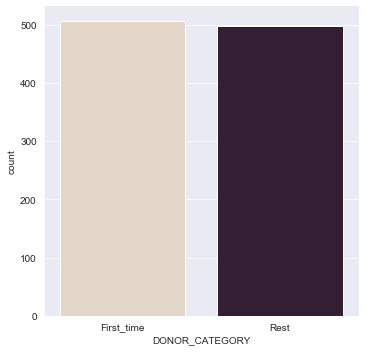

In [85]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=Reaquired_with_rest)

In [86]:
p2=Reaquired_with_rest[feature_cols]
q2=Reaquired_with_rest['DONOR_CATEGORY']

In [87]:
Reaquired_with_rest.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
1,52671,N,S,M,60,NY,13027,0,BS,1981,...,0,0,0,0,0,0,0,0,0,0
14,164602,Y,M,M,55,NY,14139,0,PHD,2000,...,0,0,0,0,0,0,0,0,0,0
22,30385,N,S,M,60,TX,75126,0,BS,1986,...,0,0,0,1,0,0,0,0,0,0
30,45229,N,S,M,55,NY,10974,0,BS,1982,...,0,0,0,0,0,0,0,0,0,0
35,69649,N,M,M,55,NY,14224,0,MBA,1989,...,0,0,0,0,0,0,0,0,0,0


In [88]:
p2_train,p2_test,q2_train,q2_test = train_test_split(p2, q2, test_size=0.3, random_state=1)

In [89]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf2 = clf2.fit(p2_train,q2_train)
q2_pred = clf2.predict(p2_test)

In [90]:
print("Accuracy:",metrics.accuracy_score(q2_test, q2_pred))

Accuracy: 0.9503311258278145


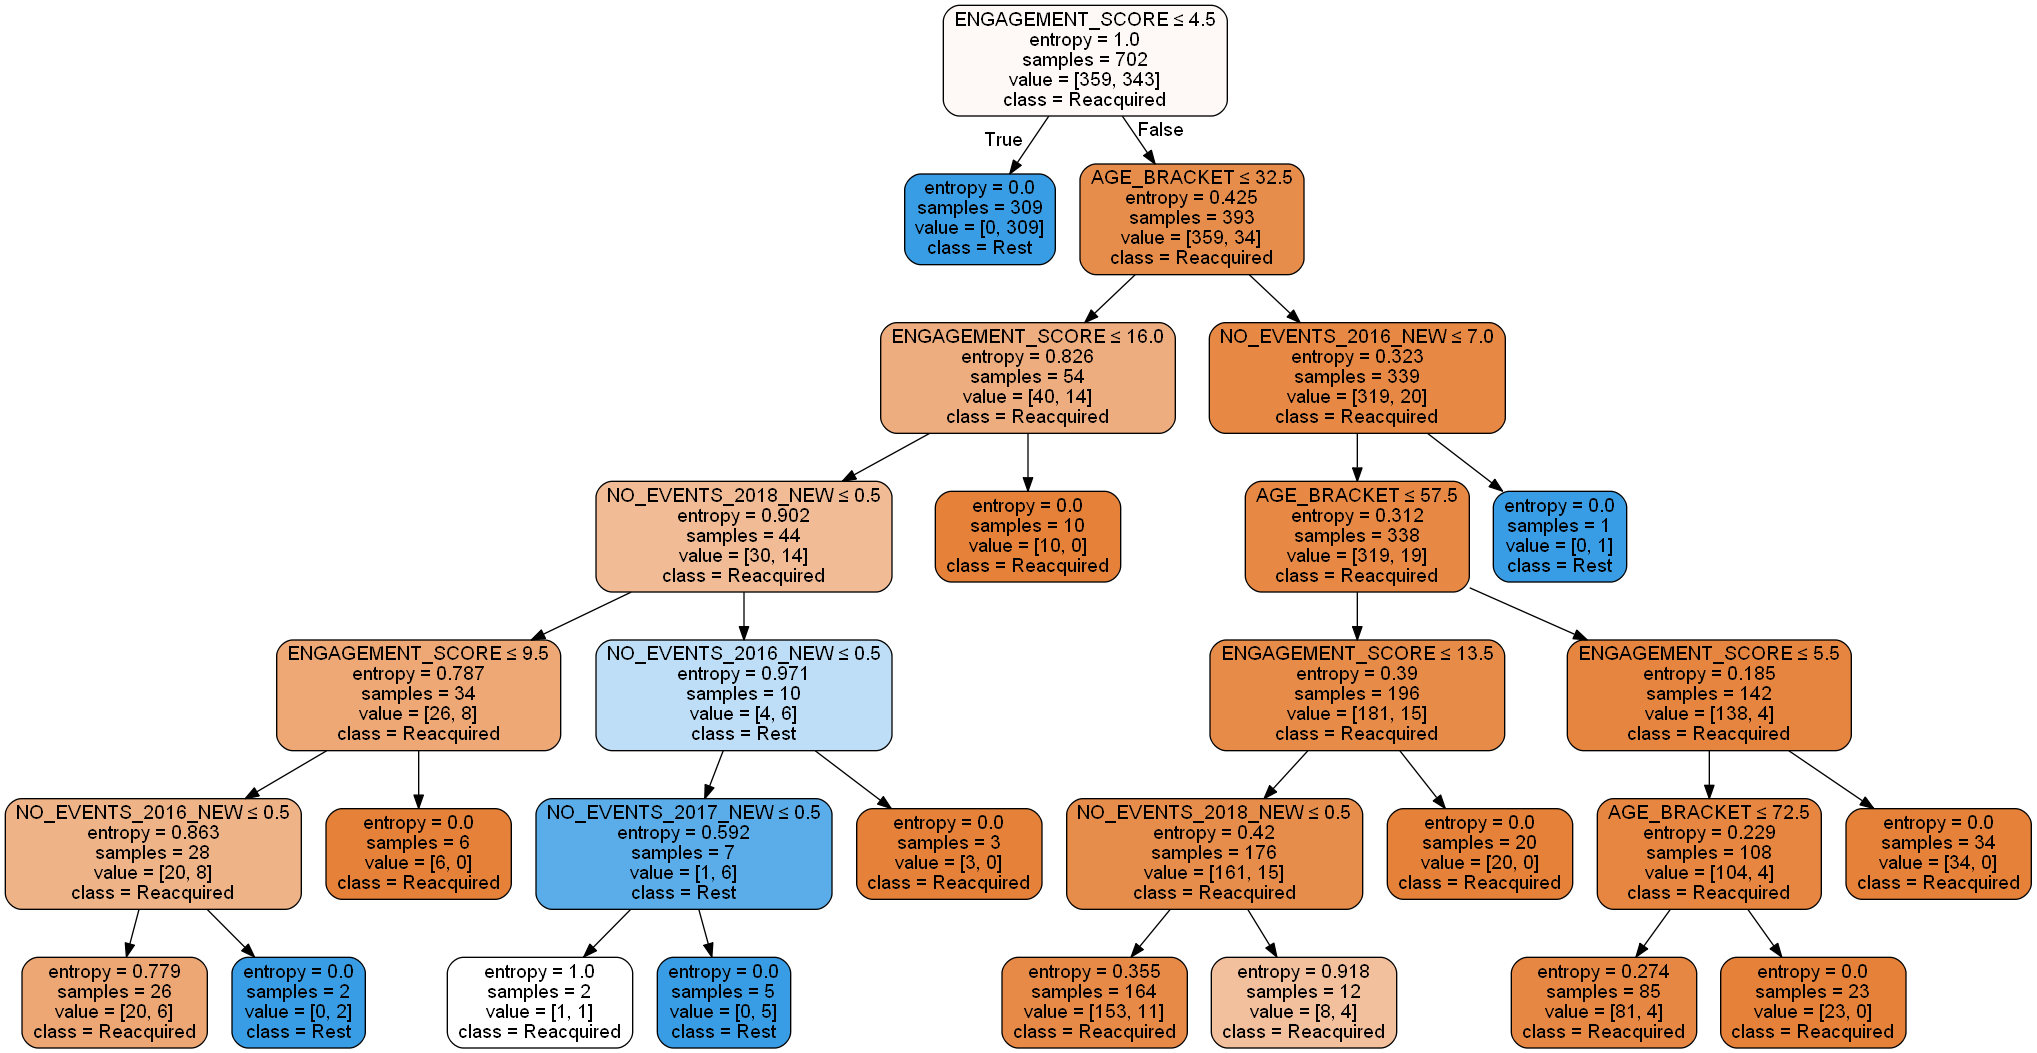

In [91]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Reacquired','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_reaquired.png')
Image(graph.create_png())

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [99]:
cat_cols = ub_philantropy.select_dtypes(include=np.object).columns.tolist()

num_cols = ub_philantropy.select_dtypes(include=np.number).columns.tolist()

In [100]:
df = ub_philantropy.copy(deep=True)
df = df[num_cols]
X = df.drop(columns=['GIFT_AMOUNT_2018_NEW'])
y = df['GIFT_AMOUNT_2018_NEW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Saving id number for future use
train_id_number = X_train['ID_NUMBER']
test_id_number = X_test['ID_NUMBER']
X_train.drop(columns=['ID_NUMBER'], inplace=True)
X_test.drop(columns=['ID_NUMBER'], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
def checkMAE(actual, pred, n):
    count = 0
    for i in range(len(actual)):
        if abs(actual[i] - pred[i]) > n:
            count +=1
    
    return count

mae_values = [10, 25, 50, 75, 100]

In [104]:
lr_train_pred = lr.predict(X_train)
print('\t\t\t\tLinear Regression with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, lr_train_pred))
print('MAE: ', mean_absolute_error(y_train, lr_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, lr_train_pred))
print('\n')
lr_test_pred = lr.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, lr_test_pred))
print('MAE: ', mean_absolute_error(y_test, lr_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i) / len(y_test) * 100), '%)')

#print('r^2: ', r2_score(y_test, lr_test_pred))

				Linear Regression with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  490712.56336312357
MAE:  51.93811799998937
Number of predicted values with >  10  AE:  18695 ( 68.06 %)
Number of predicted values with >  25  AE:  8982 ( 32.70 %)
Number of predicted values with >  50  AE:  4645 ( 16.91 %)
Number of predicted values with >  75  AE:  3491 ( 12.71 %)
Number of predicted values with >  100  AE:  2606 ( 9.49 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  132852.56207421984
MAE:  55.73007050896226
Number of predicted values with >  10  AE:  4675 ( 68.07 %)
Number of predicted values with >  25  AE:  2197 ( 31.99 %)
Number of predicted values with >  50  AE:  1160 ( 16.89 %)
Number of predicted values with >  75  AE:  873 ( 12.71 %)
Number of predicted values with >  100  AE:  641 ( 9.33 %)


In [105]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
rf_train_pred = rf.predict(X_train)
print('\t\t\t\tRandom Forest Regressor with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, rf_train_pred))
print('MAE: ', mean_absolute_error(y_train, rf_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, rf_train_pred))

print('\n')
rf_test_pred = rf.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, rf_test_pred))
print('MAE: ', mean_absolute_error(y_test, rf_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, 'AE: ', checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i) / len(y_test) * 100), '%)')
#print('r^2: ', r2_score(y_test, rf_test_pred))

				Random Forest Regressor with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  143635.86945722357
MAE:  13.582060079673468
Number of predicted values with >  10  AE:  1765 ( 6.43 %)
Number of predicted values with >  25  AE:  1039 ( 3.78 %)
Number of predicted values with >  50  AE:  608 ( 2.21 %)
Number of predicted values with >  75  AE:  448 ( 1.63 %)
Number of predicted values with >  100  AE:  358 ( 1.30 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  567991.0290536673
MAE:  42.39523851304706
Number of predicted values with >  10 AE:  591 ( 8.61 %)
Number of predicted values with >  25 AE:  449 ( 6.54 %)
Number of predicted values with >  50 AE:  309 ( 4.50 %)
Number of predicted values with >  75 AE:  238 ( 3.47 %)
Number of predicted values with >  100 AE:  190 ( 2.77 %)
